## Imports

In [7]:
import sys
import os
import importlib
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier
from pathlib import Path
import numpy as np

# Makes it so that it can import the locals modules
root_dir = Path.cwd().parent.resolve()
print(root_dir)
utils_dir = root_dir / "utils"
data_dir = root_dir / "data"

sys.path.append(str(utils_dir))
import constants
importlib.reload(sys.modules['constants'])

sys.path.append(str(utils_dir))

# Importing the local modules
print("Start!")
from evaluation import evaluate_model, check_model
print("evaluation!")
from constants import ( DATA_FILE_NAME, S2_BRIGHTNESS_OUT_COL, S3_FEED_CLO2_COL,S2_FIBER_LENGTH_OUT_COL,S3_FEED_NAOH_COL,S3_RESIDENCE_TIME_REACTOR_COL,S3_TEMP_REACTOR_IN_COL, S3_PRODUCTION_COL)
print("constants!")
from datafixing import get_data, clean_up, dividing_data
print("datafixing!")
from functions import create_shap_plots, calculate_shap_values, aggregate_data

data_path = str(data_dir / DATA_FILE_NAME) + ".parquet"




D:\Codes\Prediktiv-modellering
Start!
evaluation!
constants!
datafixing!


# Models!!

## Base model


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Boolean Series key will be reindexed to match DataFrame index.


Model metrics
  - explained_variance_score: -0.0
  - mean_absolute_error: 0.5568
  - mean_absolute_percentage_error: 0.0066
  - mean_bias: 0.0239
  - mean_squared_error: 0.5487
  - median_absolute_error: 0.4293
  - pct_obs_within_pm_1: 0.8472
  - r2_score: -0.001



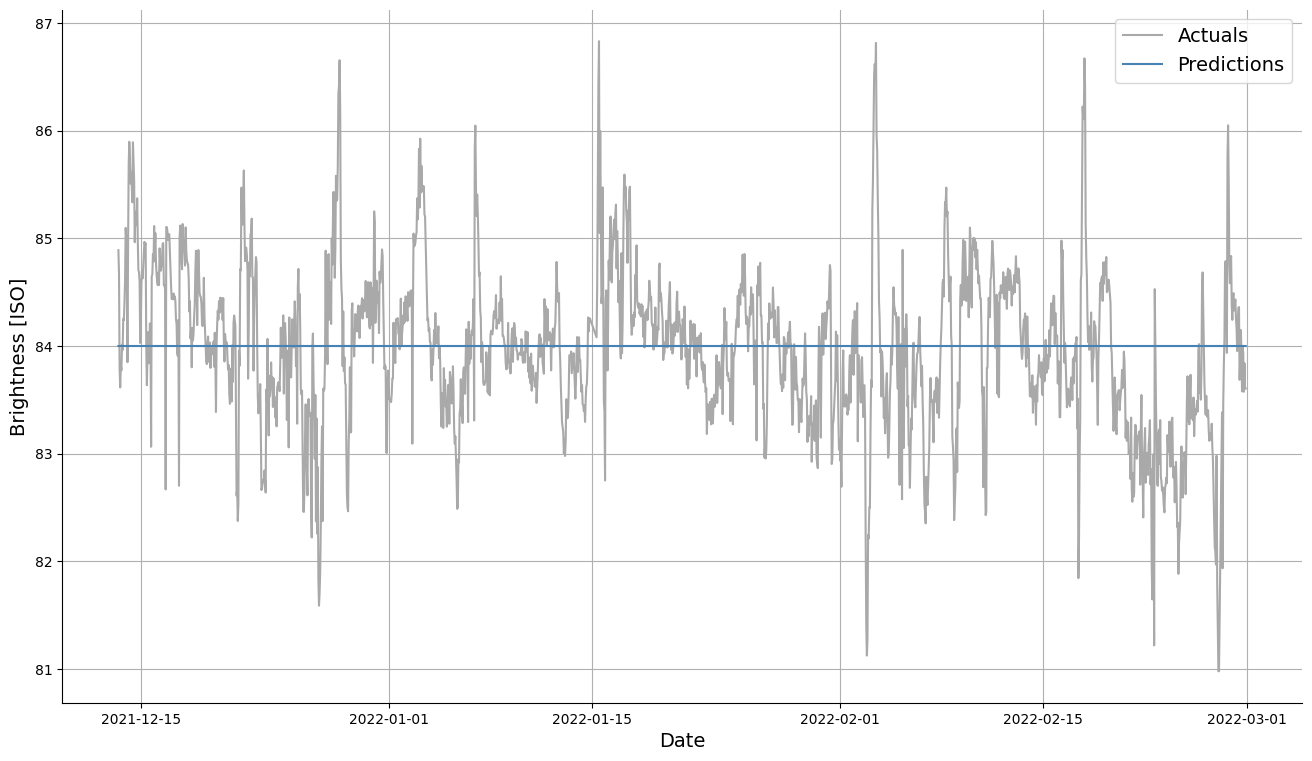

In [21]:
# Function to train the model
def train_model(data):
    # Creates a dum model 
    model = DummyClassifier()
    model.fit(data[0], data[1])
    return model

# Fetch the data to use, and specify what columns you want to have aswell. 
# Third argument may be given for an extra time offset, other than default +2.6 and time in reactor
s3 = get_data(data_path, [S3_RESIDENCE_TIME_REACTOR_COL, S3_PRODUCTION_COL]) # , S3_TEMP_REACTOR_IN_COL "s3_brightness_out"S3_FEED_CLO2_COL,S2_FIBER_LENGTH_OUT_COL,S3_FEED_NAOH_COL,

# Clean up nan values and outlaires, second imput is how many standarddiviation away the outlairs are
s3 = clean_up(s3, 3)

# Aggregate data. Second input shall be a period of time to aggregate together, ex. "2H" or "10min".
s3 = aggregate_data(s3, "1H")

# dividing data in three groups, test, validation and training. It returns a list
data = dividing_data(s3, 0.6, 0.2, 0.2)

# Traning a model with the "training" data
model = train_model(([0],[84]))


# Choose data set to evaluate on
data_select = "testing"

# Evaluating the model
evaluate_model(model, data[data_select]["data"], data[data_select]["answer"])


## LinearRegression


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Boolean Series key will be reindexed to match DataFrame index.


Model metrics
  - explained_variance_score: 0.0215
  - mean_absolute_error: 0.5538
  - mean_absolute_percentage_error: 0.0066
  - mean_bias: -0.0182
  - mean_squared_error: 0.5366
  - median_absolute_error: 0.4281
  - pct_obs_within_pm_1: 0.845
  - r2_score: 0.0209



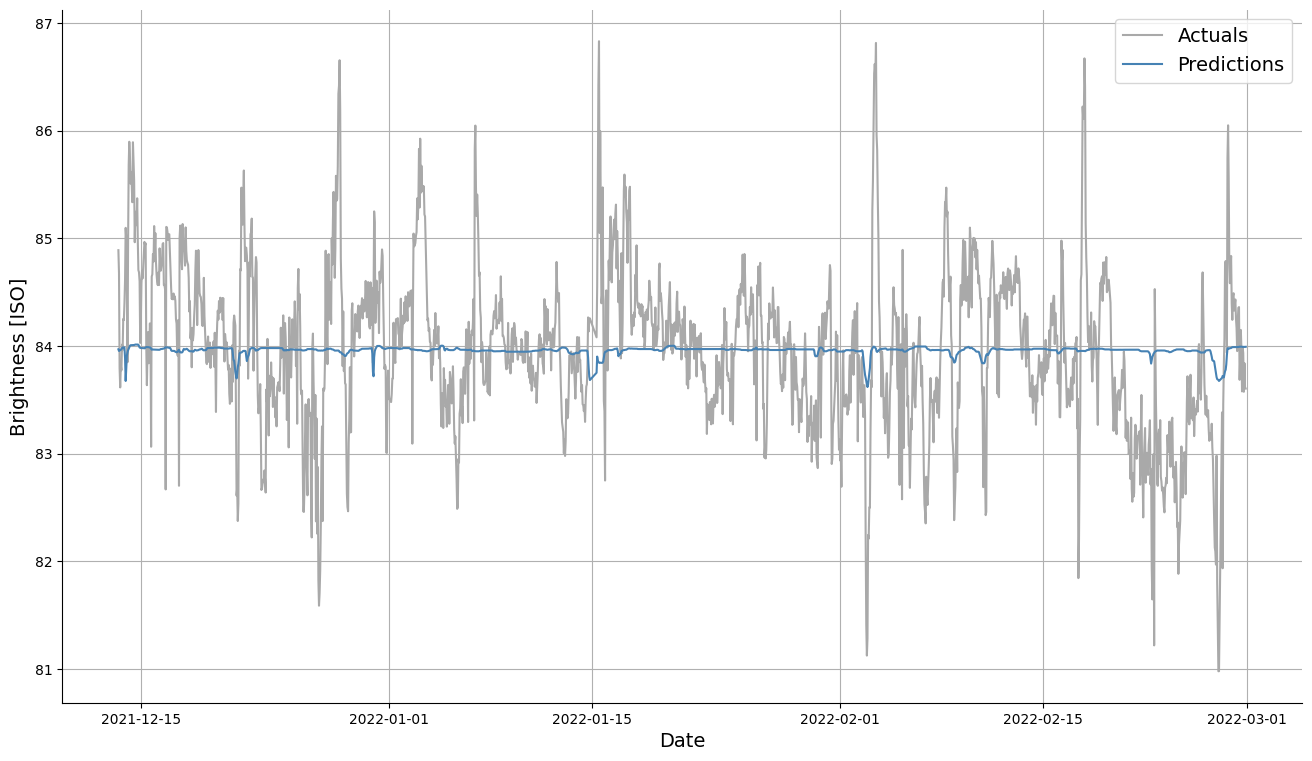

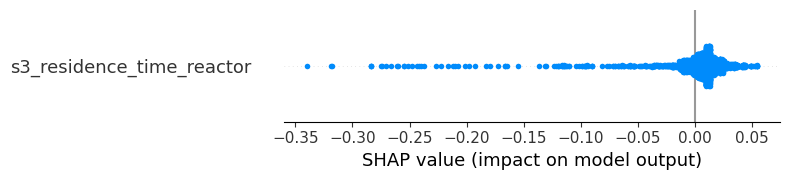

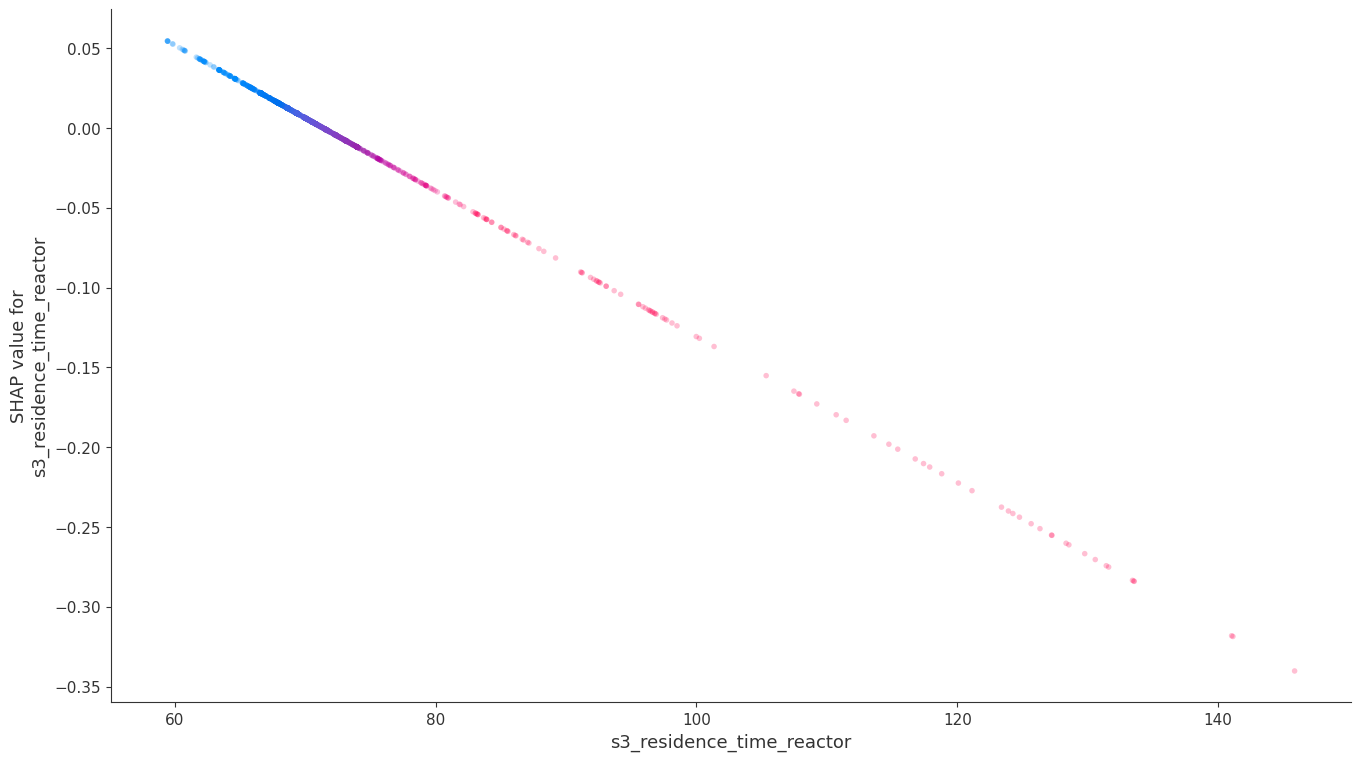

In [9]:
# Function to train the model
def train_model(data):
    # Creates a linearRegression model 
    model = LinearRegression()
    model.fit(data["data"], data["answer"])
    return model

# Fetch the data to use, and specify what columns you want to have aswell. 
# Third argument may be given for an extra time offset, other than default +2.6 and time in reactor
s3 = get_data(data_path, [S3_RESIDENCE_TIME_REACTOR_COL, S3_PRODUCTION_COL]) # , S3_TEMP_REACTOR_IN_COL "s3_brightness_out"S3_FEED_CLO2_COL,S2_FIBER_LENGTH_OUT_COL,S3_FEED_NAOH_COL,

# Clean up nan values and outlaires, second imput is how many standarddiviation away the outlairs are
s3 = clean_up(s3, 3)

# Aggregate data. Second input shall be a period of time to aggregate together, ex. "2H" or "10min".
s3 = aggregate_data(s3, "1H")

# dividing data in three groups, test, validation and training. It returns a list
data = dividing_data(s3, 0.6, 0.2, 0.2)

# Traning a model with the "training" data
model = train_model(data["training"])

# Choose data set to evaluate on
data_select = "testing"

# Evaluating the moduel
evaluate_model(model, data[data_select]["data"], data[data_select]["answer"])
shap_values = calculate_shap_values(model,"LinnearRegressor", data[data_select]["data"])
shap_plot = create_shap_plots(shap_values, data[data_select]["data"])


## RandomForestRegressor


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Boolean Series key will be reindexed to match DataFrame index.


Model metrics
  - explained_variance_score: -0.0549
  - mean_absolute_error: 0.8906
  - mean_absolute_percentage_error: 0.0106
  - mean_bias: -0.7466
  - mean_squared_error: 1.135
  - median_absolute_error: 0.8052
  - pct_obs_within_pm_1: 0.6314
  - r2_score: -1.0732



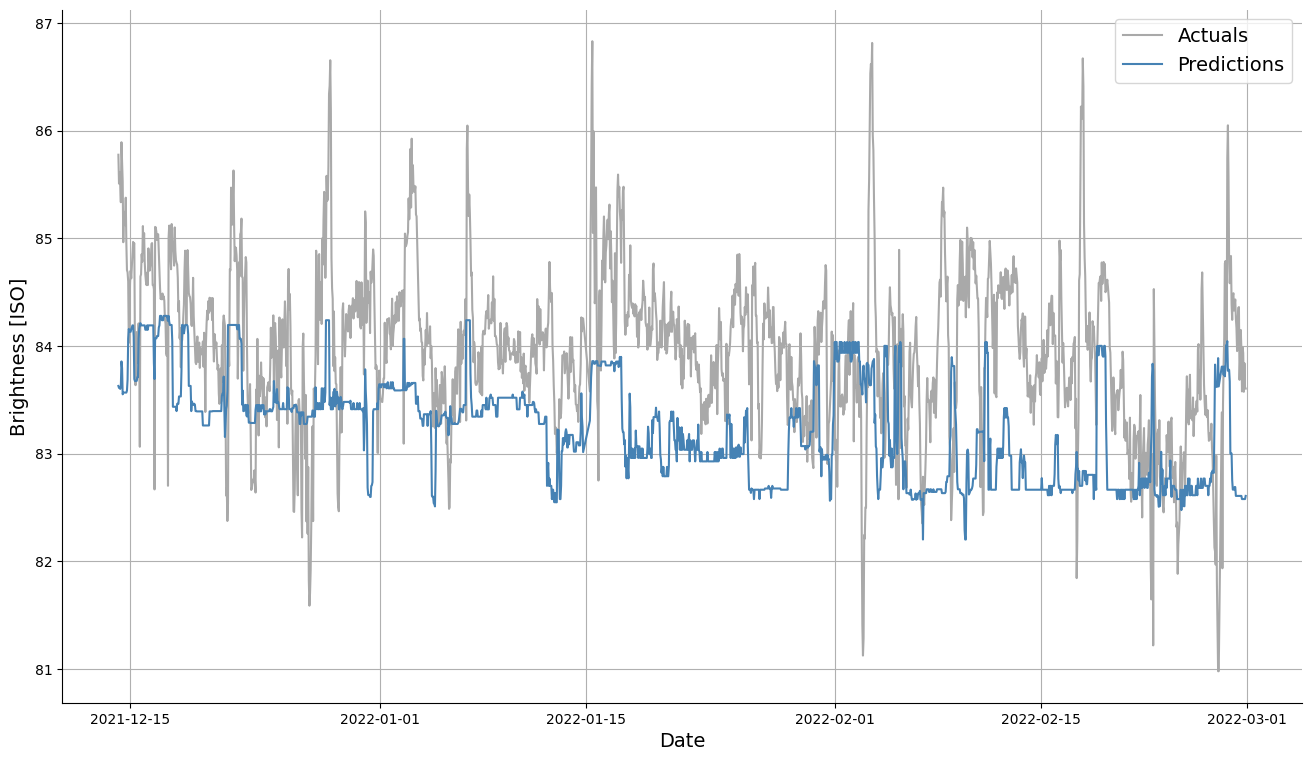

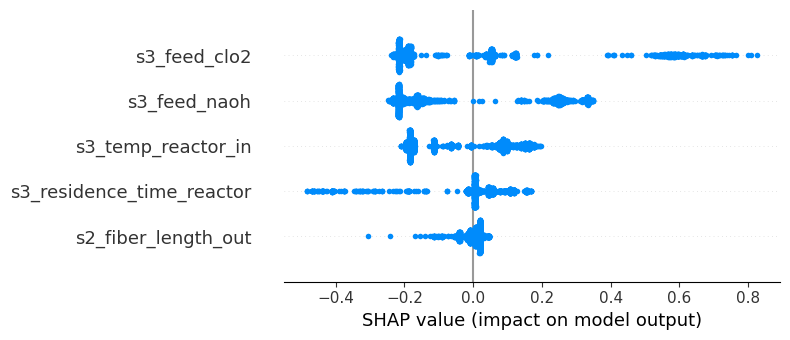

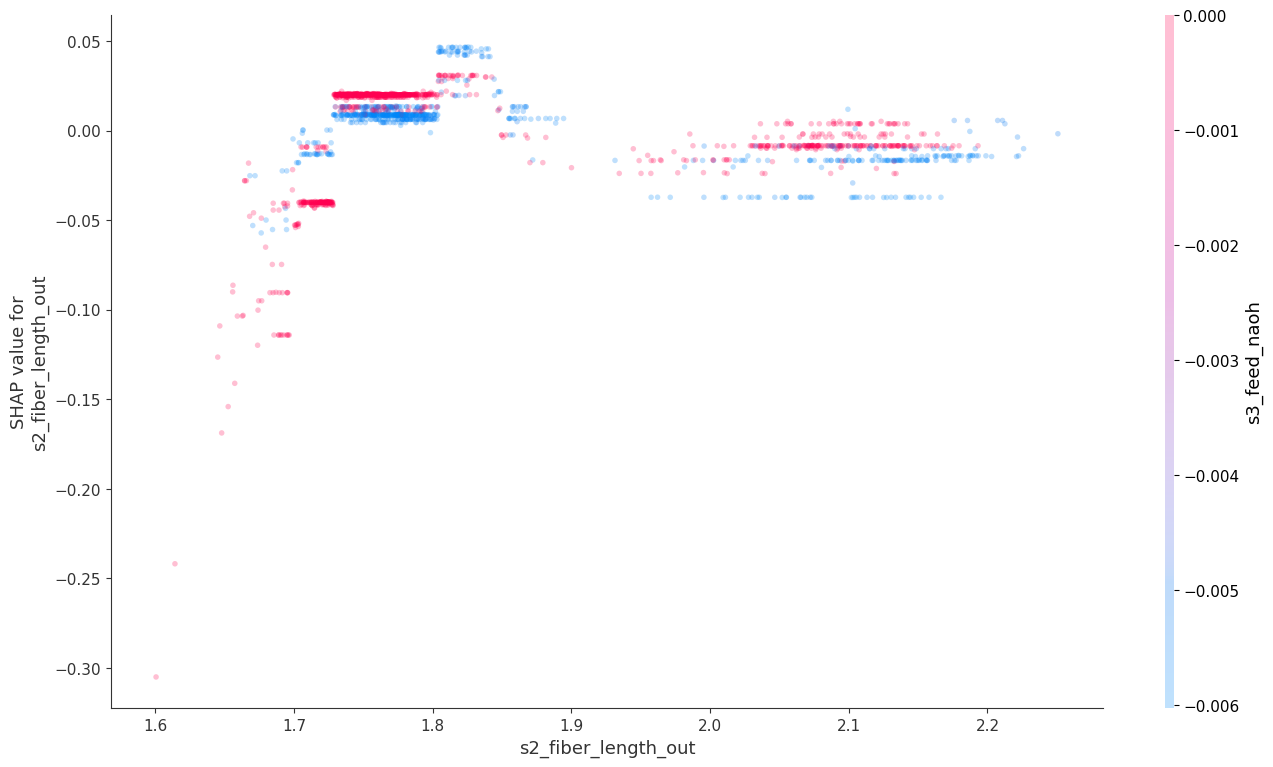

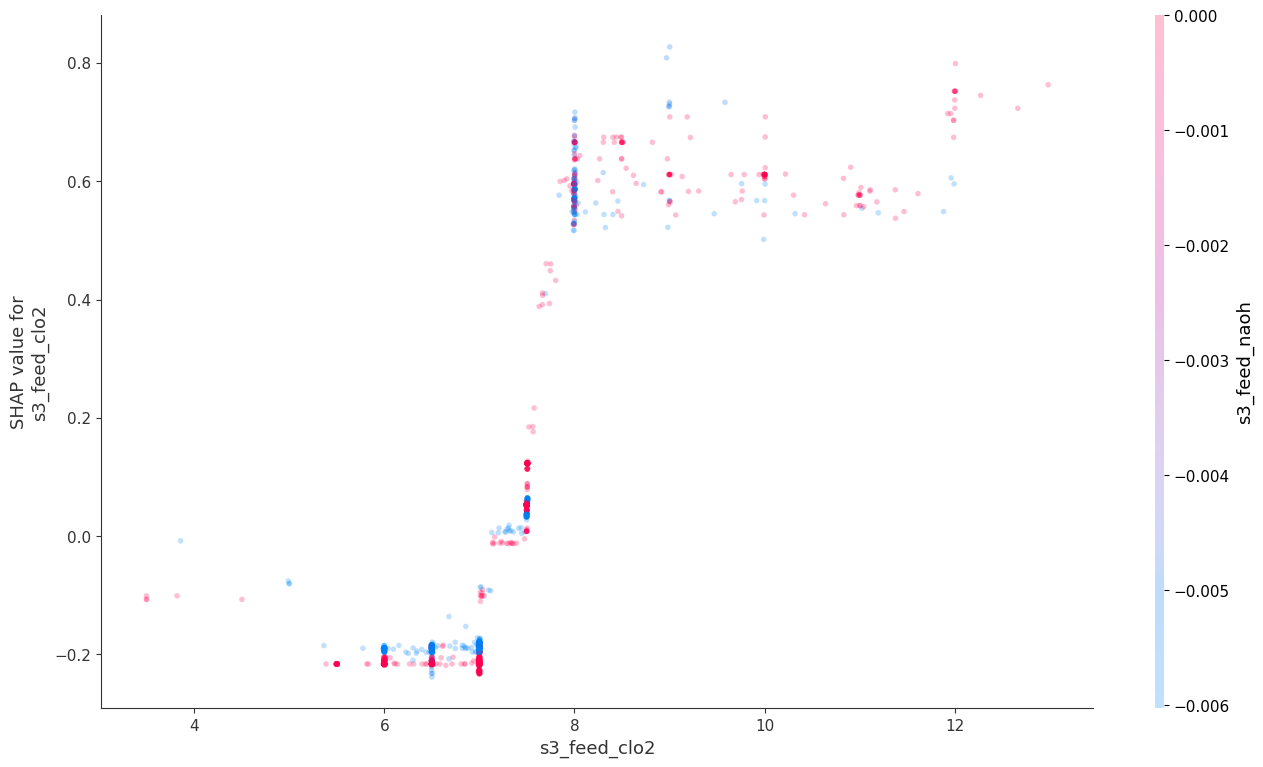

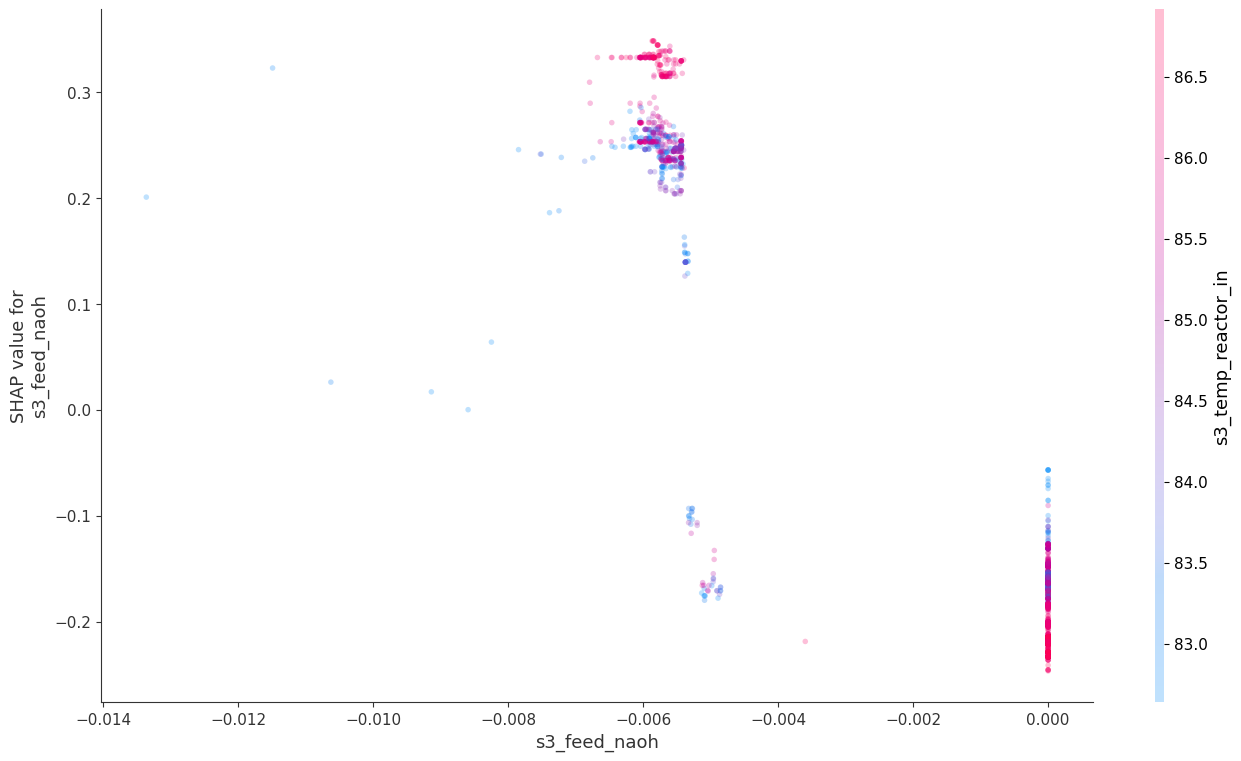

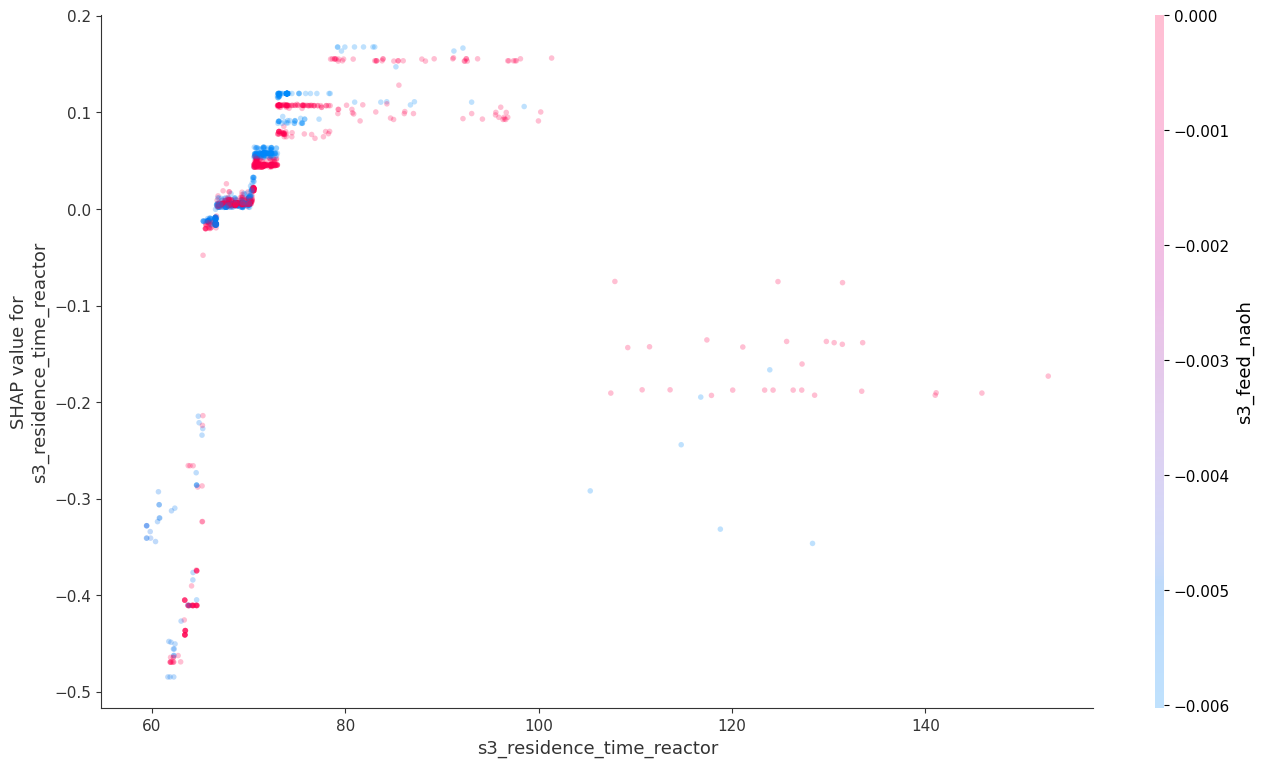

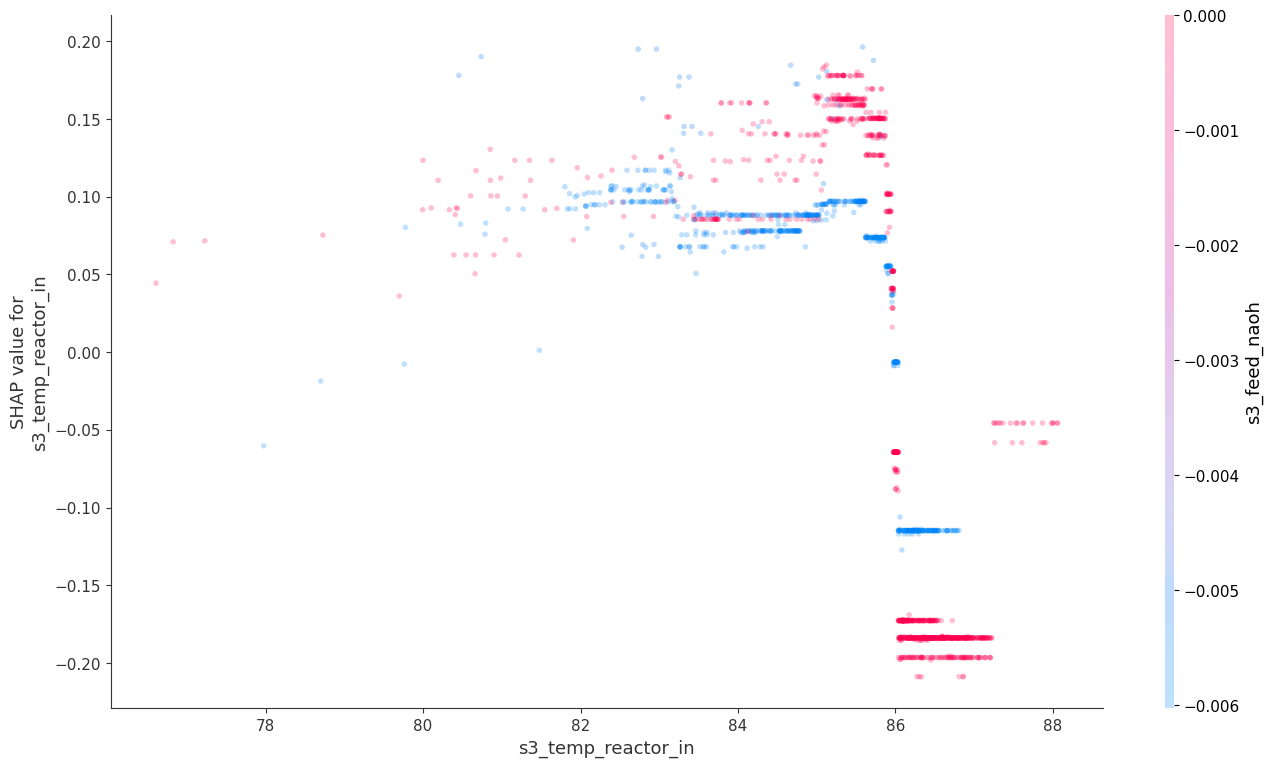

In [10]:
# Function to train the model
def train_model(data):
    # Creates a RandomForestRegressor model 
    model = RandomForestRegressor(
        n_estimators=30, max_features="sqrt", max_depth=3, random_state=18
    )
    model.fit(data["data"], data["answer"])
    return model

# Fetch the data to use, and specify what columns you want to have aswell.
s3 = get_data(str(data_dir / DATA_FILE_NAME) + ".parquet", [S3_FEED_CLO2_COL,S2_FIBER_LENGTH_OUT_COL,S3_FEED_NAOH_COL,S3_RESIDENCE_TIME_REACTOR_COL,S3_TEMP_REACTOR_IN_COL, S3_PRODUCTION_COL , "s3_brightness_out"])

# Clean up nan values and outlaires, second imput is how many standarddiviation away the outlairs are
s3 = clean_up(s3, 3)

# Aggregate data. Second input shall be a period of time to aggregate together, ex. "2H" or "10min".
s3 = aggregate_data(s3, "1H")

# dividing data in three groups, test, validation and training. It returns a list
data = dividing_data(s3, 0.6, 0.2, 0.2)

# Traning a model with the "training" data
model = train_model(data["training"])

# Choose data set to evaluate on
data_select = "testing"

# Evaluating the moduel
evaluate_model(model, data[data_select]["data"], data[data_select]["answer"])
shap_values = calculate_shap_values(model,"RandomForestRegressor", data[data_select]["data"])
shap_plot = create_shap_plots(shap_values, data[data_select]["data"])


## ElasticNet


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Boolean Series key will be reindexed to match DataFrame index.


Model metrics
  - explained_variance_score: 0.0757
  - mean_absolute_error: 0.5689
  - mean_absolute_percentage_error: 0.0068
  - mean_bias: -0.2132
  - mean_squared_error: 0.5515
  - median_absolute_error: 0.4537
  - pct_obs_within_pm_1: 0.8439
  - r2_score: -0.0073



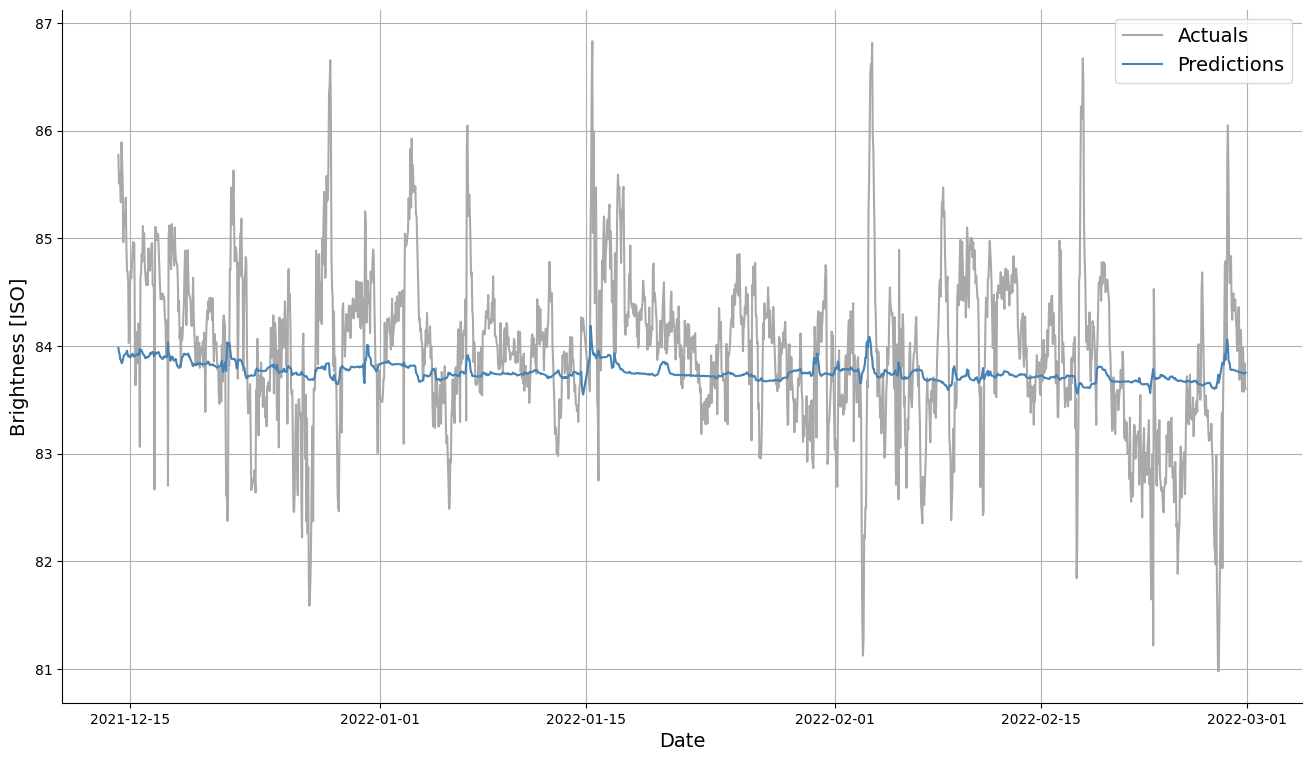

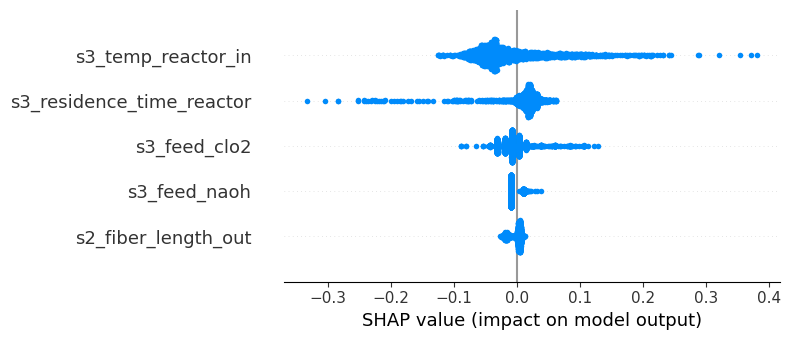

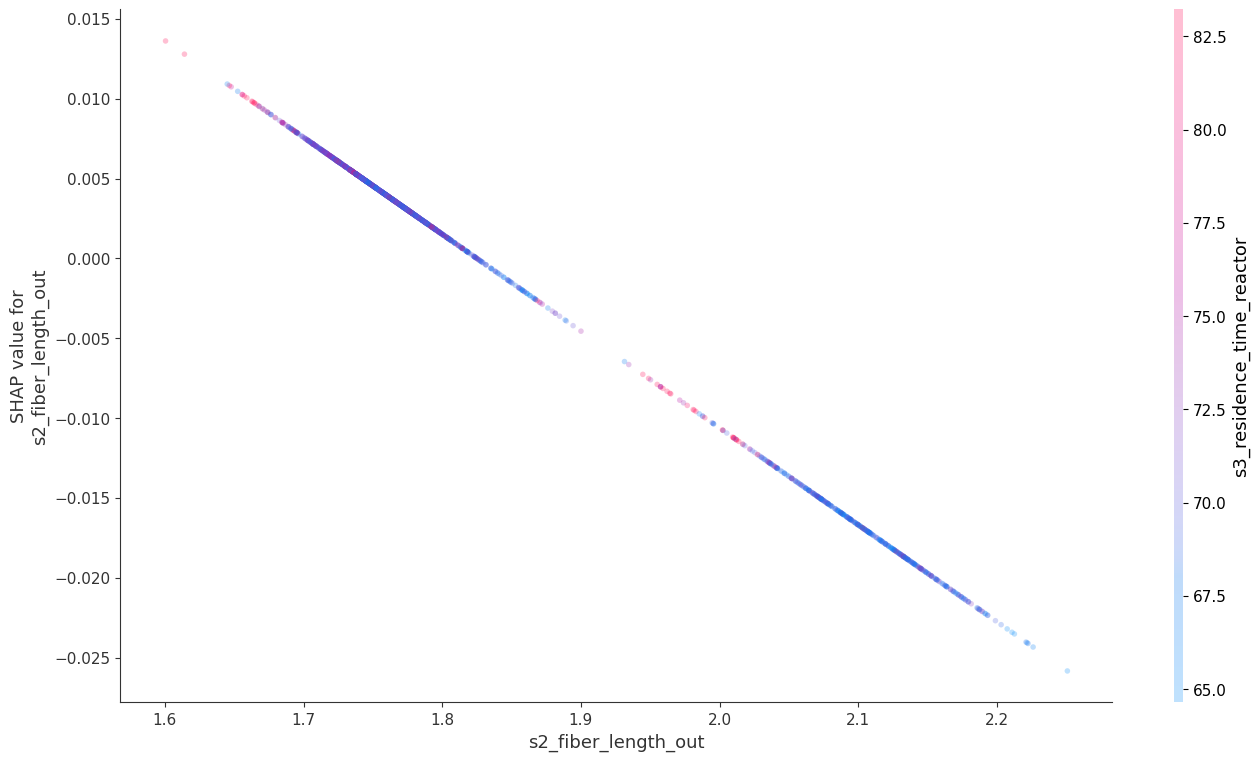

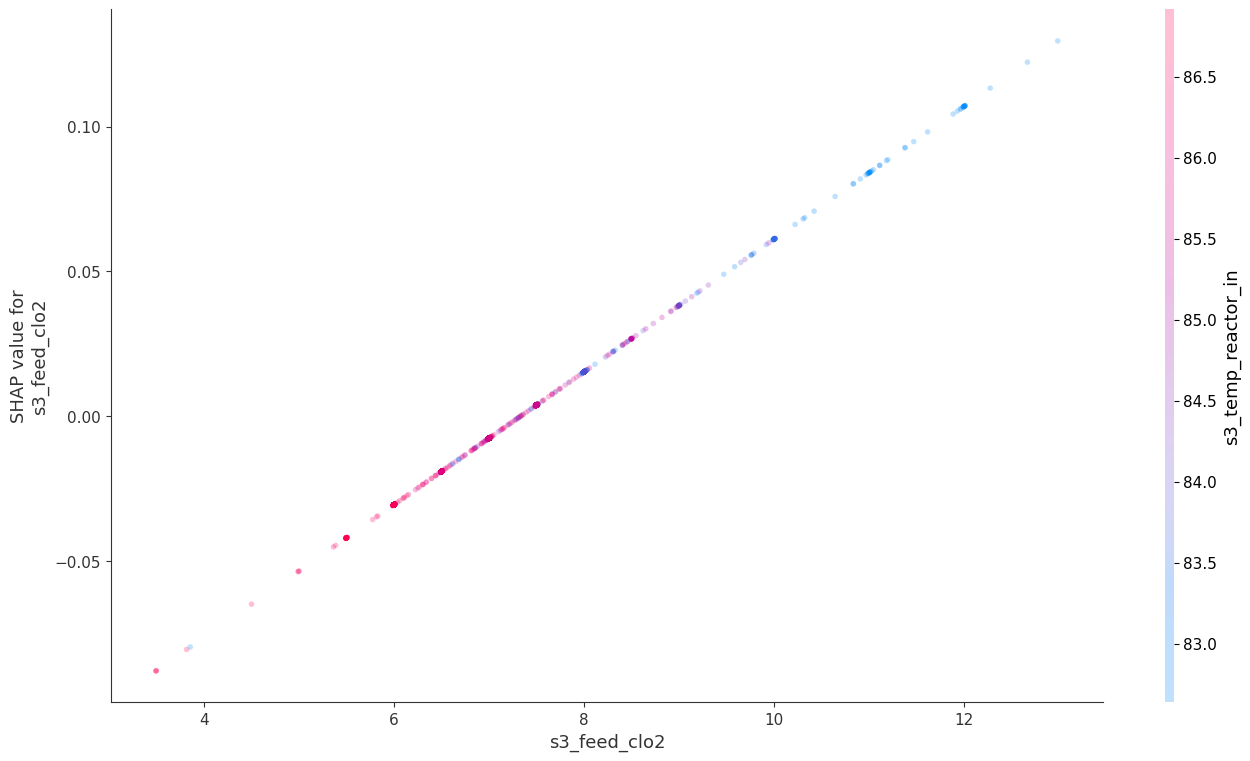

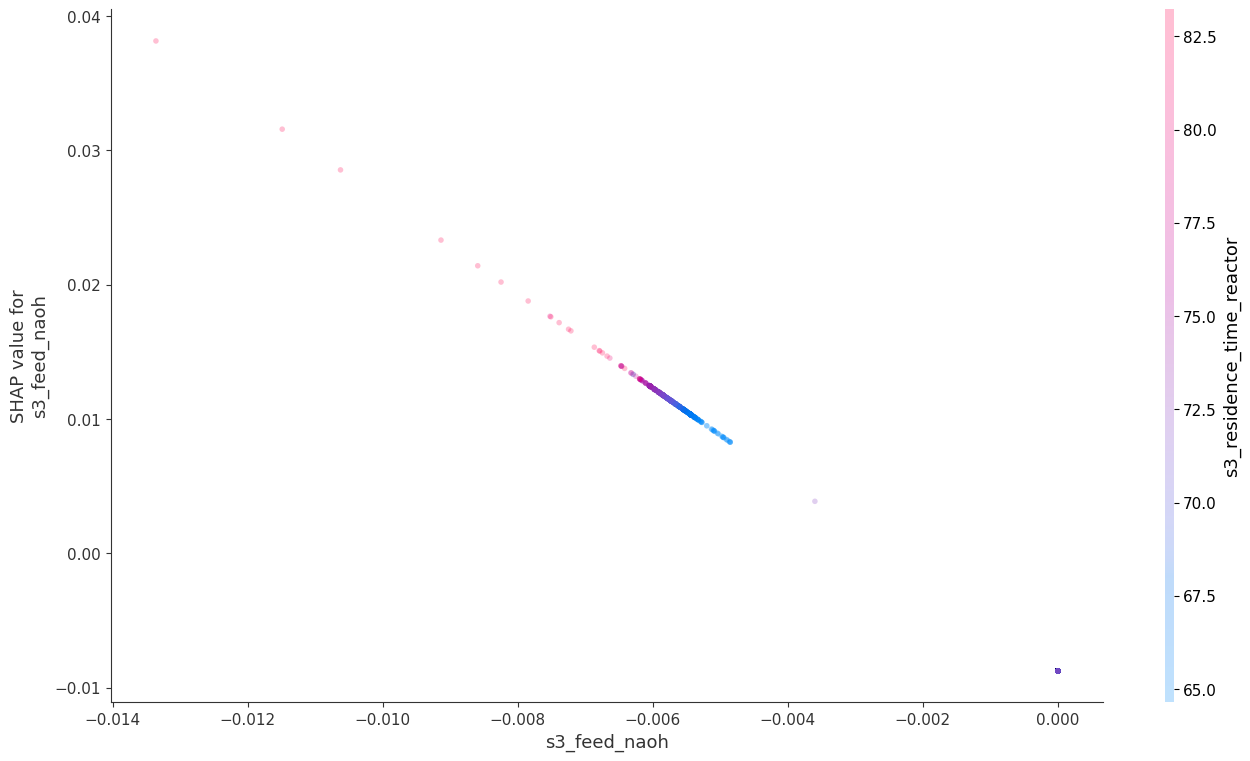

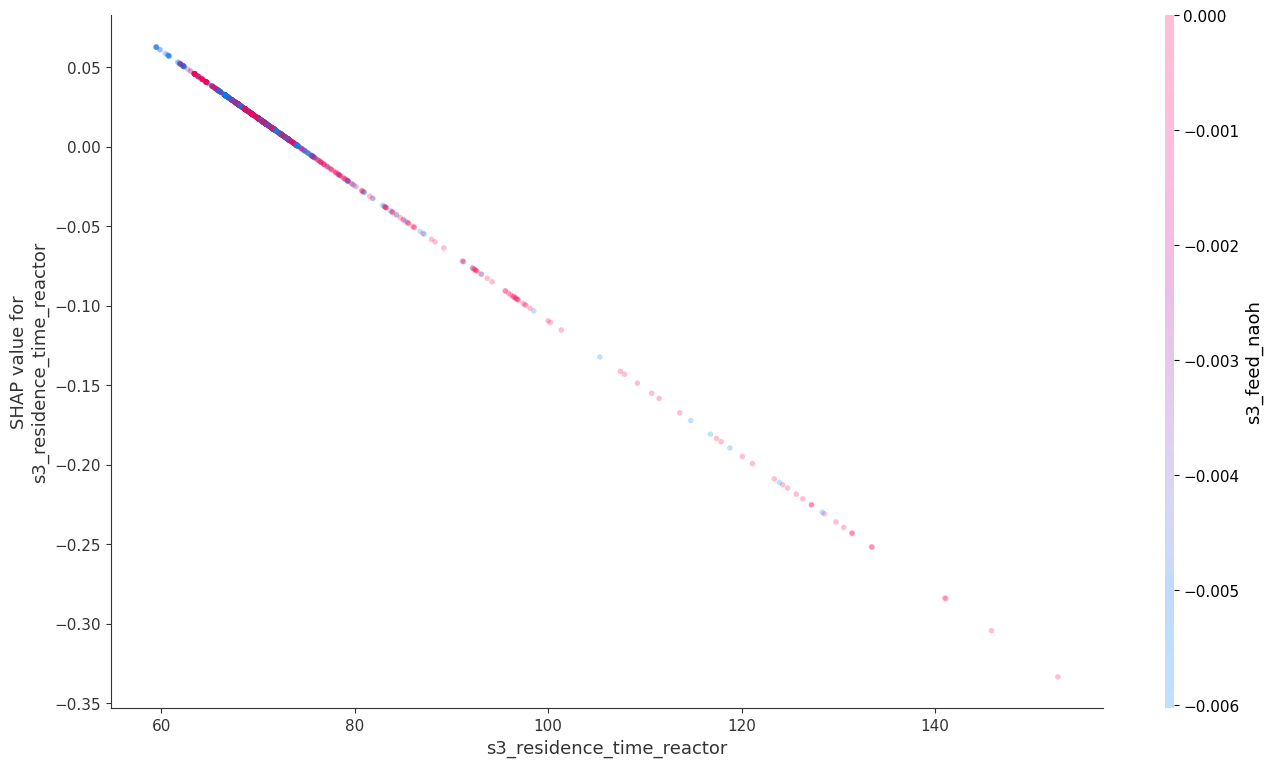

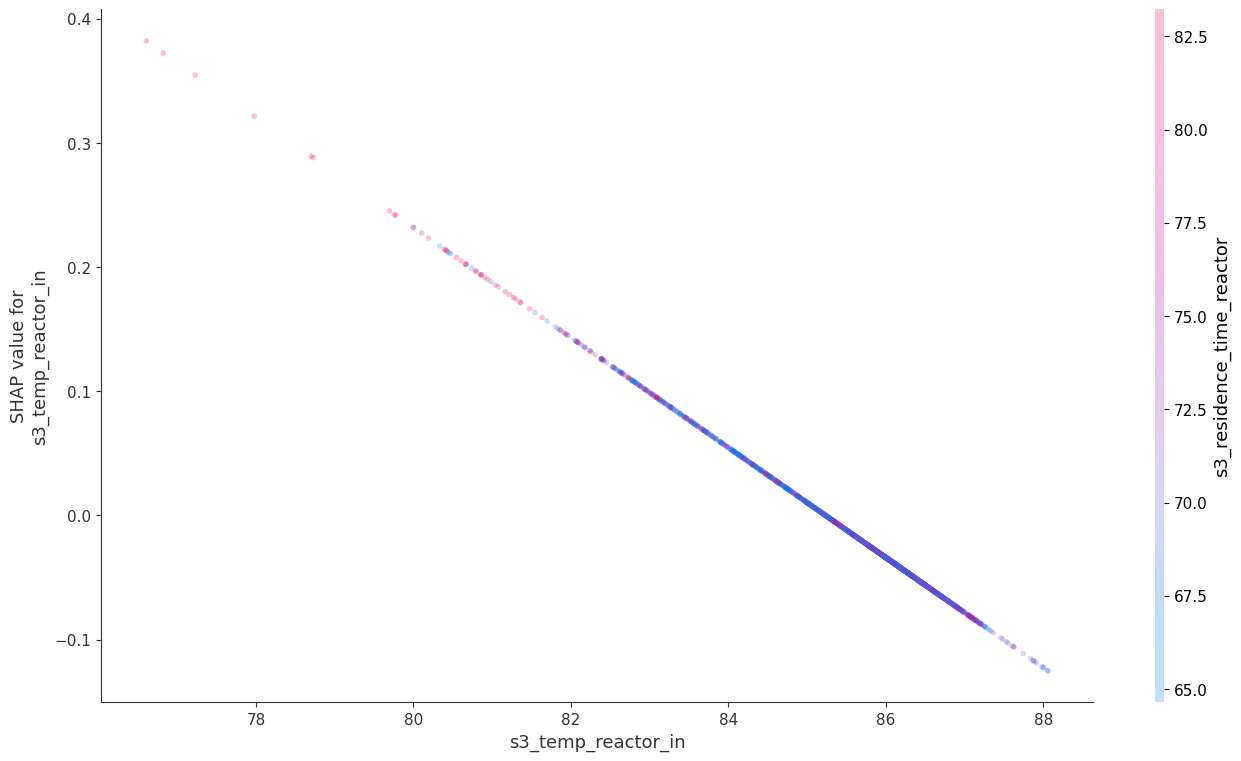

In [15]:
# Function to train the model
def train_model(data):
    # Creates a ElasticNet model 
    model = ElasticNet(alpha=0.00001)
    model.fit(data["data"], data["answer"])
    return model

# Fetch the data to use, and specify what columns you want to have aswell.
s3 = get_data(str(data_dir / DATA_FILE_NAME) + ".parquet", [S3_FEED_CLO2_COL,S2_FIBER_LENGTH_OUT_COL,S3_FEED_NAOH_COL,S3_RESIDENCE_TIME_REACTOR_COL,S3_TEMP_REACTOR_IN_COL, S3_PRODUCTION_COL , "s3_brightness_out"])

# Clean up nan values and outlaires, second imput is how many standarddiviation away the outlairs are
s3 = clean_up(s3, 3)

# Aggregate data. Second input shall be a period of time to aggregate together, ex. "2H" or "10min".
s3 = aggregate_data(s3, "1H")

# dividing data in three groups, test, validation and training. It returns a list
data = dividing_data(s3, 0.6, 0.2, 0.2)

# Traning a model with the "training" data
model = train_model(data["training"])

# Choose data set to evaluate on
data_select = "testing"

# Evaluating the moduel
evaluate_model(model, data[data_select]["data"], data[data_select]["answer"])
shap_values = calculate_shap_values(model,"ElasticNet", data[data_select]["data"])
shap_plot = create_shap_plots(shap_values, data[data_select]["data"])